In [1]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [22]:
with open(f'Step1/dataframes/{11}.df', "rb") as f:
    df = pickle.load(f)

df.head()

,Rx,Tx,MPP Start Time (s),MPP Stop Time (s),Voltages (mV),Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,1.763086e+09,1.763086e+09,"[9.73, 46.35, 46.5, 46.5, 46.27, 46.35, 46.2, ...",775,3,1
1,Tag3,Tag2,1.763086e+09,1.763086e+09,"[118.6, 12.17, 12.17, 12.32, 12.25, 12.17, 12....",775,3,1
2,Tag2,Tag1,1.763086e+09,1.763086e+09,"[13.39, 4.84, 6.98, 6.98, 6.9, 6.98, 7.21, 7.1...",775,3,1
3,Tag3,Tag1,1.763086e+09,1.763086e+09,"[12.25, 14.15, 14.08, 14.0, 13.92, 14.31, 14.1...",775,3,1
4,Tag1,Tag3,1.763086e+09,1.763086e+09,"[46.12, 47.65, 48.03, 47.88, 47.95, 47.88, 48....",775,3,1


In [23]:
# #correction only remove later
# corrected_df=pd.DataFrame(columns=["Rx","Tx", "MPP Start Time (s)",
#                             "MPP Stop Time (s)","Voltages (mV)",
#                             "Frequency (MHz)", "Run Exp Num"])

# for idx in range(df.shape[0]):
#     corrected_df=pd.concat([corrected_df,pd.DataFrame([df.iloc[idx][0]])],ignore_index=True)
#     corrected_df=pd.concat([corrected_df,pd.DataFrame([df.iloc[idx][1]])],ignore_index=True)
    

In [24]:
# df=corrected_df
df["NumMPPs"]=5
# df

In [25]:
print(len(df))

138


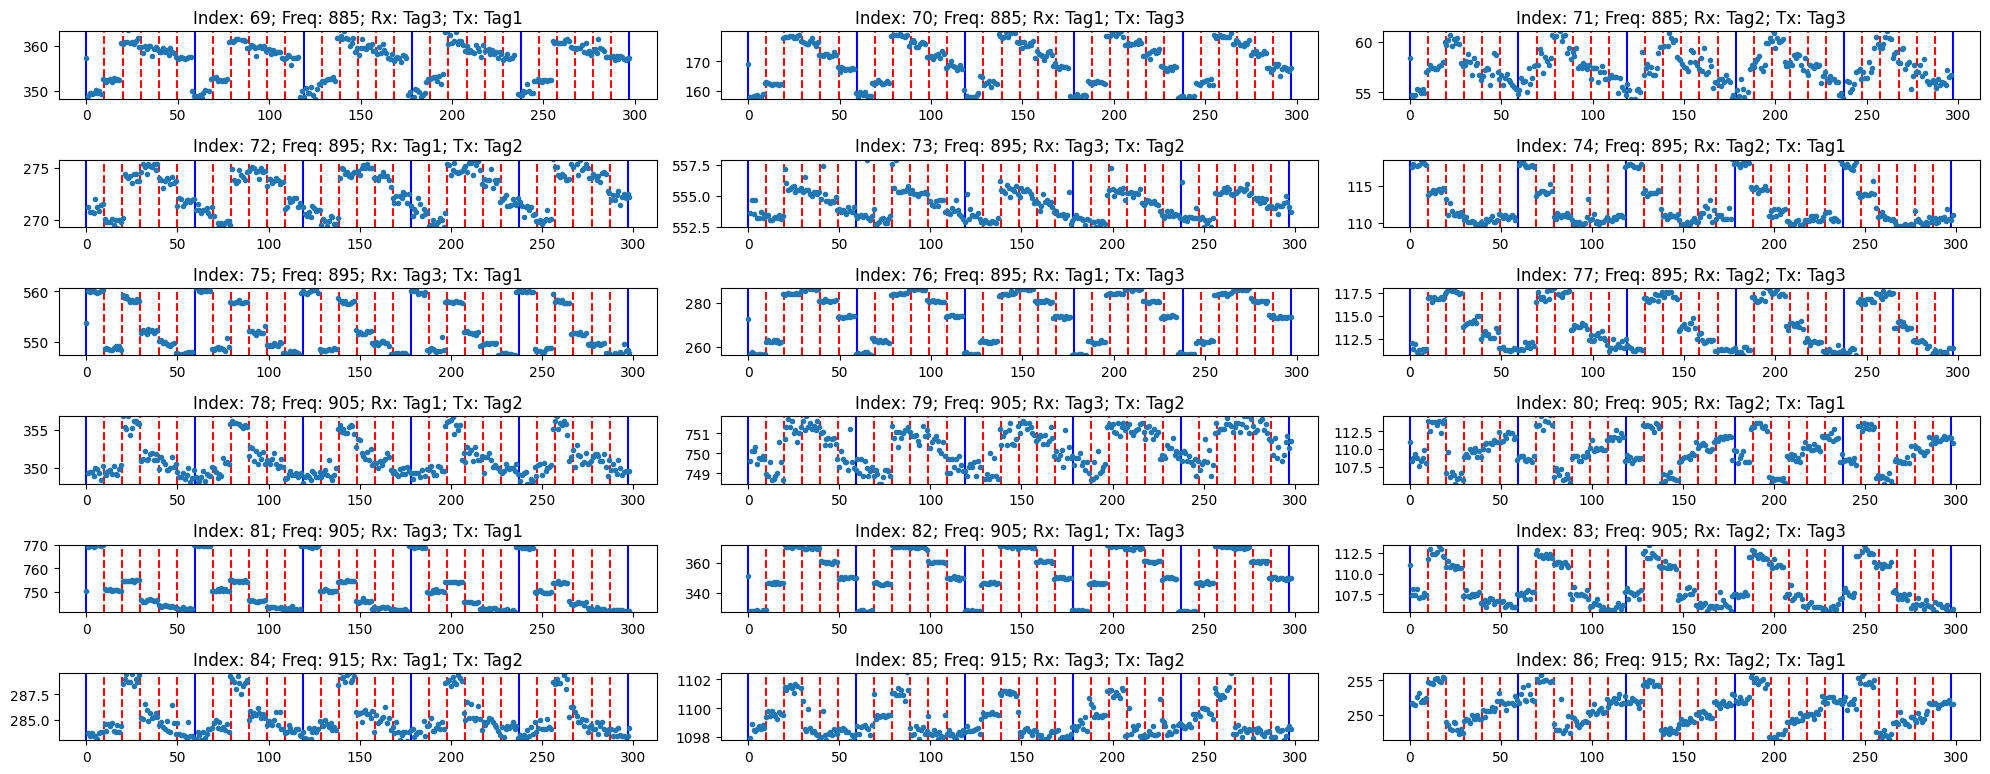

In [26]:

time_per_phase = 10/1000  # s
num_phases=6
num_mpps=int(df.iloc[0]['NumMPPs'])
sampling_rate=1000
plotting=True
ver_lines = [0] + [ (time_per_phase-time_per_phase*0.01) * sampling_rate * (i + 1) for i in range(num_phases*num_mpps)]

processedDF=pd.DataFrame(columns=["Rx","Tx", "Voltages (mV)", "Phase1","Phase2","Phase3","Phase4","Phase5","Phase6",
                                "Frequency (MHz)", "Run Exp Num", "NumMPPs"])
plt.figure(figsize=(20,60))
# for df_idx in range(len(df)):
for df_idx in range(69,(69+18)):

    voltages=df.iloc[df_idx]['Voltages (mV)']
    phase_medians={
        1:[],
        2:[],
        3:[],
        4:[],
        5:[],
        6:[],
    }
    for idx,v in enumerate(ver_lines):
        if idx<len(ver_lines)-1:
            phase_medians[int(idx%num_phases)+1].append(np.median(voltages[int(ver_lines[idx]):int(ver_lines[idx+1])]))   
        if plotting:
            plt.subplot(len(df)//3+1, 3, df_idx+1)
            if idx%num_phases==0:
                plt.axvline(x=v, color='b', linestyle='-')
            else:
                plt.axvline(x=v, color='r', linestyle='--')
    entry={
        "Rx": df.iloc[df_idx]["Rx"],
        "Tx":df.iloc[df_idx]["Tx"],
        "Voltages (mV)":df.iloc[df_idx]["Voltages (mV)"],
        "Phase1":phase_medians[1],
        "Phase2":phase_medians[2],
        "Phase3":phase_medians[3],
        "Phase4":phase_medians[4],
        "Phase5":phase_medians[5],
        "Phase6":phase_medians[6],
        "Frequency (MHz)":df.iloc[df_idx]["Frequency (MHz)"],
        "Run Exp Num":df.iloc[df_idx]["Run Exp Num"],
        "NumMPPs":df.iloc[df_idx]["NumMPPs"],
    }
    
    # Identify and print bad MPPs
    # bad=False
    # for k in phase_medians.keys():
    #     assert(len(phase_medians[k])==num_mpps)
    #     if np.std(phase_medians[k])>1:
    #         print(f"Bad data found at {df_idx} df_idx at phase {k}.")
    #         print(len(phase_medians[k]), np.mean(phase_medians[k]), np.std(phase_medians[k]))
    
    processedDF=pd.concat([processedDF,pd.DataFrame([entry])],ignore_index=True)
    if plotting:
        plt.ylim([np.percentile(voltages,1), np.percentile(voltages,99)])
        plt.plot(voltages,'.')
        plt.title(f"Index: {df_idx}; Freq: {df.iloc[df_idx]['Frequency (MHz)']}; Rx: {df.iloc[df_idx]['Rx']}; Tx: {df.iloc[df_idx]['Tx']}")
        plt.tight_layout()
    # break
        
if plotting:
    plt.show()
    
    

In [21]:
processedDF

,Rx,Tx,Voltages (mV),Phase1,Phase2,Phase3,Phase4,Phase5,Phase6,Frequency (MHz),Run Exp Num,NumMPPs
0,Tag3,Tag1,"[322.38, 314.15, 314.68, 315.37, 315.29, 313.8...","[315.14, 314.525, 314.565, 314.945, 314.6]","[315.33000000000004, 315.21, 314.9450000000000...","[324.1, 324.905, 324.025, 324.44, 324.18]","[322.195, 321.70000000000005, 322.195000000000...","[321.24, 320.63, 320.70500000000004, 320.86, 3...","[319.67499999999995, 319.45000000000005, 319.2...",885,0,5
1,Tag1,Tag3,"[142.63, 129.36, 129.05, 129.36, 129.51, 129.2...","[129.36, 130.275, 130.35000000000002, 129.74, ...","[128.865, 129.245, 129.7, 129.015, 130.0450000...","[143.7, 144.69, 144.2, 144.31, 143.665]","[145.115, 145.65, 145.38, 145.495, 145.115]","[142.79, 142.86, 142.98000000000002, 142.51999...","[138.67000000000002, 139.16, 139.62, 138.89499...",885,0,5
2,Tag2,Tag3,"[44.14, 46.04, 46.35, 46.58, 46.12, 45.97, 46....","[46.04, 46.65, 46.655, 46.695, 46.54]","[41.81, 41.96, 42.08, 41.845, 42.0]","[41.084999999999994, 41.195, 41.27500000000000...","[44.33, 44.67, 44.44, 44.75, 44.67]","[45.47, 45.43, 45.47, 45.55, 45.74]","[46.045, 46.31, 46.54, 46.35, 46.65]",885,0,5
3,Tag1,Tag2,"[138.9, 181.54, 181.85, 181.47, 181.24, 181.77...","[181.77, 182.5, 182.84, 182.65, 181.81]","[181.2, 181.27499999999998, 181.81, 181.43, 18...","[173.83499999999998, 174.065, 174.75, 174.14, ...","[179.905, 180.78, 181.08499999999998, 180.32, ...","[181.315, 181.7, 181.735, 181.315, 181.695]","[182.26999999999998, 182.88, 182.995, 182.5, 1...",895,0,5
4,Tag3,Tag2,"[319.71, 535.02, 535.32, 534.87, 534.87, 534.8...","[535.02, 535.02, 534.41, 534.41, 533.34]","[534.145, 533.375, 533.3, 532.96, 531.855]","[537.0, 536.4300000000001, 536.81, 535.86, 535...","[538.645, 538.185, 538.07, 537.38, 536.735]","[537.54, 537.16, 537.12, 536.24, 536.47]","[535.5550000000001, 535.36, 535.135, 534.37, 5...",895,0,5
5,Tag2,Tag1,"[46.12, 78.47, 78.39, 79.16, 78.93, 78.55, 79....","[78.93, 79.35, 80.34, 80.605, 81.14]","[82.4, 83.00999999999999, 83.35, 83.9250000000...","[75.53, 76.1, 76.485, 77.02, 77.44]","[78.05000000000001, 78.395, 78.89, 79.12, 79.9...","[79.35, 79.69, 80.455, 80.76, 81.715]","[80.61, 81.255, 81.595, 82.32, 82.85499999999999]",895,0,5
6,Tag3,Tag1,"[536.93, 543.26, 542.95, 542.95, 543.26, 543.4...","[543.18, 543.8299999999999, 544.9000000000001,...","[534.145, 534.87, 535.745, 535.6700000000001, ...","[538.3399999999999, 539.52, 539.6, 540.05, 539...","[534.5999999999999, 535.175, 535.4000000000001...","[533.1500000000001, 534.18, 534.22, 533.99, 53...","[532.1600000000001, 533.19, 533.4549999999999,...",895,0,5
7,Tag1,Tag3,"[182.76, 161.94, 161.4, 162.32, 161.63, 161.63...","[161.63, 161.78, 161.89499999999998, 162.05, 1...","[165.32999999999998, 165.14, 164.95, 164.53, 1...","[183.185, 183.415, 183.3, 183.3, 183.644999999...","[186.085, 185.97, 185.93, 185.66, 185.815]","[181.655, 181.7, 181.505, 181.58499999999998, ...","[176.125, 176.01, 175.82, 176.05, 176.315]",895,0,5
8,Tag2,Tag3,"[82.59, 81.14, 82.89, 82.36, 82.74, 81.67, 81....","[82.36, 82.21000000000001, 82.4, 82.28, 82.095]","[72.25, 72.29, 72.095, 72.06, 72.37]","[69.96000000000001, 70.11500000000001, 70.4199...","[76.22, 76.675, 76.71, 76.49, 76.565]","[79.195, 79.23, 79.35, 79.23, 79.23]","[81.025, 81.18, 81.78999999999999, 81.56, 81.37]",895,0,5
9,Tag1,Tag2,"[175.75, 269.51, 268.67, 270.28, 269.28, 268.8...","[269.05, 268.9, 268.635, 269.13, 269.05]","[269.59, 269.475, 269.36, 269.43499999999995, ...","[260.395, 260.36, 260.055, 259.98, 260.5850000...","[263.49, 263.145, 263.105, 263.33, 263.525]","[265.32, 264.86, 265.125, 265.08500000000004, ...","[268.175, 267.645, 267.83500000000004, 268.18,...",905,0,5
